<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03  </font></center></h1>
<h2><center> <font color='black'> Customer Segmentation</font></center></h2>   
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Fall 2021</font></center></h2>
</div>

# Homework instructions
- Please name your homeworks in the following format BDAFall2021_HWX_Name_Surname.ipynb then it will be easier to grade your homeworks and smaller possibility for a human mistake.
- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**20 October at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- For coding related questions, do submit your code as well as your explanation/answer. (Check the homework Description video to know more about it)

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- Please <font color='red'>do not change</font> the template of this notebook file. You can download the .ipynb file and work on that.


**<h2><font color='red'>Team mates:</font></h2>**


<font color='#0072CE'>Name: Raivo Kasepuu</font>&emsp;   <font color='#0072CE'>Student ID: B710710</font>


<font color='#0072CE'>Name: Maarja Parve</font>&emsp;   <font color='#0072CE'>Student ID: B99902</font>




At the end of the homework, please measure its complexity from 0 to 10 (0 - very easy, 10 - enormously hard).


In [1]:
print("Hello! Welcome to our HW3")
print("Maarja and Raivo are ready for this challenge!")
import pandas as pd

Hello! Welcome to our HW3
Maarja and Raivo are ready for this challenge!


In [2]:
df = pd.read_csv('Clients-and-Order.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     4378 non-null   int64  
 1   product      4378 non-null   object 
 2   client_id    4378 non-null   int64  
 3   order_date   4378 non-null   object 
 4   money_spent  4378 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 171.1+ KB


In [7]:
print("Let's have a look, what input data we got:")
df.info()
df.head()
df.shape

Let's have a look, what input data we got:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     4378 non-null   int64         
 1   product      4378 non-null   object        
 2   client_id    4378 non-null   int64         
 3   order_date   4378 non-null   datetime64[ns]
 4   money_spent  4378 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 171.1+ KB
    order_id product  client_id order_date  money_spent
0          1       a        473 2017-04-02        14.80
1          1       b        473 2017-04-02       112.47
2          1       c        473 2017-04-02       235.69
3          1       b        473 2017-04-02        28.38
4          2       a        282 2017-02-17         8.36
..       ...     ...        ...        ...          ...
95        23       c        326 2

(4378, 5)

## Question 1  (2.5 points in total)

### Question 1.1 (0.5 points)

Using Clients-and-Order data, perform the RFM analysis. Repeat the tasks which have been done during the lab session and calculate the RFM_score for reporting date '2017-04-11' which is max order date.

In [4]:
print("Question 1.1 (0.5 points) answer:")
print()
print("Converting order_date to datetime...")
df.order_date = pd.to_datetime(df.order_date)
print("order_date type is now: " + str(df.order_date.dtypes))
print()
print("Setting reporting date....")
reporting_date = df.order_date.max()
print("Reporting date: " + str(reporting_date))
print()
print("number of unique clients...")
df.client_id.nunique()
print("Number of unique clients: " + str(df.client_id.nunique()))
print()
print("RFM score...")
rfm = df.groupby('client_id').agg({'order_date': lambda date: int((reporting_date - date.max()).days), 'order_id': lambda num: num.shape[0], 'money_spent': lambda price: price.sum()})
rfm.columns = ['recency', 'frequency', 'monetary']
print(rfm.head())
print()
print("Lets compute quantile of RFM values...")
rfm['r_quantile'] = pd.qcut(rfm['recency'], 5, ['1','2','3','4', '5'])
rfm['f_quantile'] = pd.qcut(rfm['frequency'], 5, ['5', '4','3','2','1'])
rfm['m_quantile'] = pd.qcut(rfm['monetary'], 5, ['5', '4','3','2','1'])
print("Lets combine all three quartiles in a single column...")
rfm['RFM_Score'] = rfm.r_quantile.astype(str)+ rfm.f_quantile.astype(str) + rfm.m_quantile.astype(str)

print(rfm['RFM_Score'])
rfm.shape


Question 1.1 (0.5 points) answer:

Converting order_date to datetime...
order_date type is now: datetime64[ns]

Setting reporting date....
Reporting date: 2017-04-11 00:00:00

number of unique clients...
Number of unique clients: 457

RFM score...
           recency  frequency  monetary
client_id                              
1               37          6    570.40
2               34          7    537.62
3               27         12   1123.90
4               17         11   1755.30
5                8          8    492.74

Lets compute quantile of RFM values...
Lets combine all three quartiles in a single column...
client_id
1      344
2      344
3      322
4      221
5      134
      ... 
555    143
556    122
557    245
558    122
560    554
Name: RFM_Score, Length: 457, dtype: object


(457, 7)

### Question 1.2 (0.5 points)

 Also, do the same but with a new reporting date  '2017-04-01'.
(Create a dataset with the 'order_date' < '2017-04-02 00:00:00')
Store recency, frequency, monetary, RFM_score for both datasets, so that for each client you have two sets of measures.

In [9]:
print("Lets create new dataset (df_new) with max order date '2017-04-01': ")
df_new = df[df['order_date'] < '2017-04-02 00:00:00']

print("number of unique clients in the second dataset...")
df_new.client_id.nunique()
print("Number of unique clients in the second dataset: " + str(df_new.client_id.nunique()))

print("Lets record second reporting_date_new as 2017-04-01...")
reporting_date_new = df_new.order_date.max()

print("Lets calculate the frequency, recency and monetary values...")
rfm_new = df_new.groupby('client_id').agg({'order_date': lambda date: int((reporting_date_new - date.max()).days),
                                   'order_id': lambda num: num.shape[0],
                                   'money_spent': lambda price: price.sum()})

rfm_new.columns = ['recency_new', 'frequency_new', 'monetary_new']

print("Lets compute quantile of RFM values...")
rfm_new['r_quantile'] = pd.qcut(rfm_new['recency_new'], 5, ['1','2','3','4', '5'])
rfm_new['f_quantile'] = pd.qcut(rfm_new['frequency_new'], 5, ['5', '4','3','2','1'])
rfm_new['m_quantile'] = pd.qcut(rfm_new['monetary_new'], 5, ['5', '4','3','2','1'])

print("Lets combine all three quartiles in a single column...")
rfm_new['RFM_Score_new'] = rfm_new.r_quantile.astype(str)+ rfm_new.f_quantile.astype(str) + rfm_new.m_quantile.astype(str)

print("Lets store recency, frequency, monetary, RFM_score for both datasets, so that for each client we have two sets of measures...")

new_df = pd.DataFrame([rfm.recency, rfm_new.recency_new, rfm.frequency, rfm_new.frequency_new, rfm.monetary, rfm_new.monetary_new, rfm.RFM_Score, rfm_new.RFM_Score_new]).transpose()
print(new_df.head(20))
new_df.shape


Lets create new dataset (df_new) with max order date '2017-04-01': 
number of unique clients in the second dataset...
Number of unique clients in the second dataset: 439
Lets record second reporting_date_new as 2017-04-01...
Lets calculate the frequency, recency and monetary values...
Lets compute quantile of RFM values...
Lets combine all three quartiles in a single column...
Lets store recency, frequency, monetary, RFM_score for both datasets, so that for each client we have two sets of measures...
          recency recency_new frequency  ... monetary_new RFM_Score RFM_Score_new
client_id                                ...                                     
1              37          27         6  ...        570.4       344           344
2              34          24         7  ...       537.62       344           344
3              27          17        12  ...       1123.9       322           222
4              17           7        11  ...       1755.3       221           121
5 

### Question 1.3 (1 point)



Compare the results for two reporting dates . Do you see any significant difference in distributions of three measures?

One way to compare the results is to visually compare the distribution of measures (recency, frequency, monetary). 






Lets compare recency measure for two different dates...


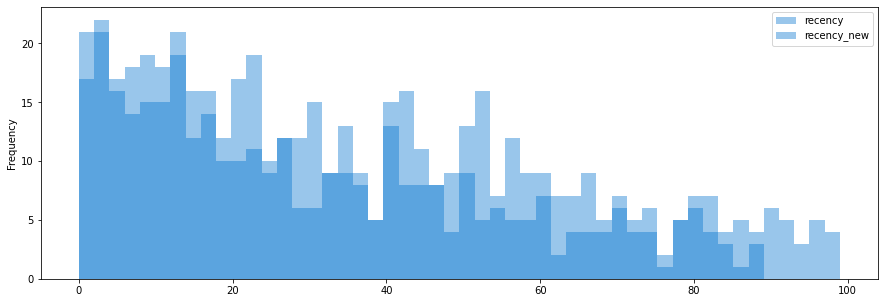

In [ ]:
print("Lets compare recency measure for two different dates...")
recency_comp = new_df[['recency', 'recency_new']]
recency_comp.plot(kind='hist', alpha=0.4, bins=50, figsize=(15,5), color = '#0072ce')

Lets compare monetary measure for two different dates


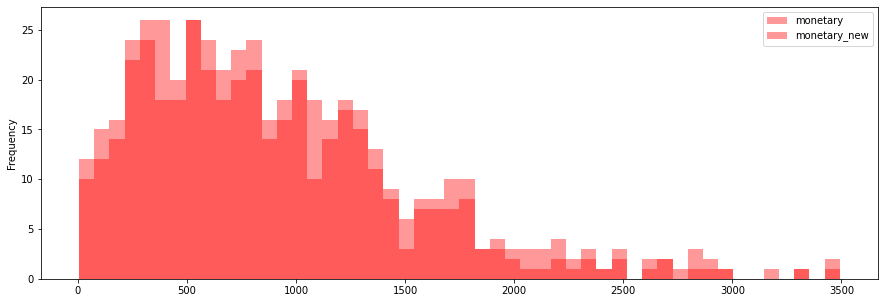

In [ ]:
print("Lets compare monetary measure for two different dates")
recency_comp = new_df[['monetary', 'monetary_new']]
recency_comp.plot(kind='hist', alpha=0.4, bins=50, figsize=(15,5),color = 'red')

Lets compare frequency measure for two different dates


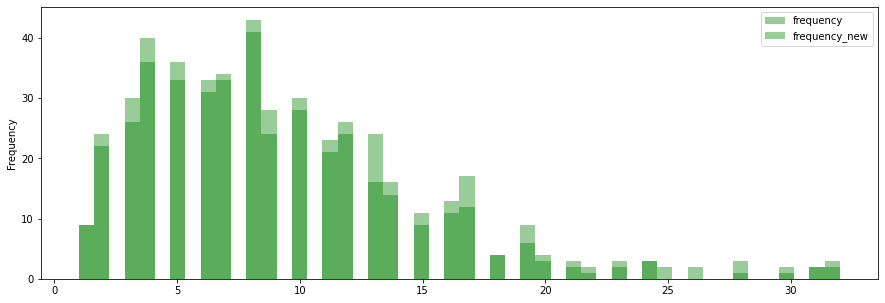

In [ ]:
print("Lets compare frequency measure for two different dates")
recency_comp = new_df[['frequency', 'frequency_new']]
recency_comp.plot(kind='hist', alpha=0.4, bins=50, figsize=(15,5), color = "g")

There are significant differences comparing two reporting dates.


### Question 1.4 (0.5 points)

Calculate the number of customers who changed thier Recency, Frequency, Monetary clusters and RMF Score.
Analyze why this has happened? 
Write your code instead of X below 

In [ ]:
new_df.head(20)


,recency,recency_new,frequency,frequency_new,monetary,monetary_new,RFM_Score,RFM_Score_new
client_id,,,,,,,,
1,37,27,6,6,570.4,570.4,344,344
2,34,24,7,7,537.62,537.62,344,344
3,27,17,12,12,1123.9,1123.9,322,222
4,17,7,11,11,1755.3,1755.3,221,121
5,8,84,8,2,492.74,28.55,134,555
6,12,2,15,15,1196.7,1196.7,212,112
7,45,35,2,2,159.27,159.27,455,355
8,38,28,5,5,565.41,565.41,344,344
9,27,17,12,12,1402.62,1402.62,321,221


In [17]:
import numpy as np  

def counter(old, new):
  counter = 0
  for i in range(len(old - 1)):
    if int(old[i]) != int(new[i]):
      counter += 1
  return counter

recency = np.array(new_df.recency.fillna(0).astype('int64'))
recency_new = np.array(new_df.recency_new.fillna(0).astype('int64'))

frequency = np.array(new_df.frequency.fillna(0).astype('int64'))
frequency_new = np.array(new_df.frequency_new.fillna(0).astype('int64'))

monetary = np.array(new_df.monetary.fillna(0).astype('int64'))
monetary_new = np.array(new_df.monetary_new.fillna(0).astype('int64'))

RFM_Score = np.array(new_df.RFM_Score.fillna(0).astype('int64'))
RFM_Score_new = np.array(new_df.RFM_Score_new.fillna(0).astype('int64'))


In [18]:
print("Recency cluster changed for " + str(counter(recency, recency_new)) + " customers")
print("Frequency cluster changed for " + str(counter(frequency, frequency_new)) + " customers")
print("Monetary cluster changed for " + str(counter(monetary, monetary_new)) + " customers")
print("RFM_Score changed for " + str(counter(RFM_Score, RFM_Score_new)) + " customers")
print("There are significant differences comparing two reporting dates. The reason could be differences in order values, different products bought etc")

Recency cluster changed for 454 customers
Frequency cluster changed for 93 customers
Monetary cluster changed for 93 customers
RFM_Score changed for 325 customers
There are significant differences comparing two reporting dates. The reason could be differences in order values, different products bought etc


## Question 2  (3.5 points in total)

Imagine that you are working in a company that offers different types of furniture. Use the customer survey data “customer_survey.csv” that contains information on
customers. Description of the dataset is as follows:
* age: age of the customer
* gender: male or female
* income: total income of the customer
* kids: number of kids
* ownHome: whether a customer owns a house or not
* subscribe: whether customer subscribed to mailing service or not

In [ ]:
print("First, lets import this data and have a look on it...")

dfr = pd.read_csv('customers_survey.csv', sep=' ')
dfr.head()
dfr.info()

First, lets import this data and have a look...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        300 non-null    float64
 1   gender     300 non-null    object 
 2   income     300 non-null    float64
 3   kids       300 non-null    int64  
 4   ownHome    300 non-null    object 
 5   subscribe  300 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


### Question 2.1 (1 point) 
Convert all factor columns to numerical. Each different value should be converted to separate number (for example, Yes => 1; No => 0). 

You can use data["Column"].map(dict) funciton, where dict is a dictionary of values you want to convert (for the above example it will be dict = {'No' : 0, 'Yes' : 1}). (0.5p)






In [ ]:
print("We have to convert data...")
print()
print("We will make following assumptions for conversion:")
print("gender: 1 means 'male', 0 means 'female'")
print("ownHome: 1 means 'ownYes', 0 means 'ownNo'")
print("subscribe: 1 means 'subYes', 0 means 'subNo'")

print("function for changing values:")
def magic_value_converter(value):
  if 'Yes' in value or 'Male' in value:
    return 1
  else:
    return 0

dfr['ownHome'] = dfr['ownHome'].apply(lambda x: magic_value_converter(x))
dfr['subscribe'] = dfr['subscribe'].apply(lambda x: magic_value_converter(x))
dfr['gender'] = dfr['gender'].apply(lambda x: magic_value_converter(x))
print()

print("As we can see, all values in our dataFrame are now numeric values!")
dfr.head()
dfr.info()


We have to convert data...

We will make following assumptions for conversion:
gender: 1 means 'male', 0 means 'female'
ownHome: 1 means 'ownYes', 0 means 'ownNo'
subscribe: 1 means 'subYes', 0 means 'subNo'
function for changing values:

As we can see, all values in our dataFrame are now numeric values!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        300 non-null    float64
 1   gender     300 non-null    int64  
 2   income     300 non-null    float64
 3   kids       300 non-null    int64  
 4   ownHome    300 non-null    int64  
 5   subscribe  300 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 14.2 KB


 Rescale all columns.(0.5p)

In [ ]:
print("Rescaling process...")

from sklearn.preprocessing import scale
dfr_rescaled = pd.DataFrame(scale(dfr), index=dfr.index, columns=dfr.columns)

print("Result: ")
dfr_rescaled.head(10)

Rescaling process...
Result: 


,age,gender,income,kids,ownHome,subscribe
0,0.482136,1.047808,-0.072310,0.519169,-0.941697,-0.392232
1,-0.773501,1.047808,-0.765533,-0.192021,1.061913,-0.392232
2,0.157706,1.047808,-0.336618,-0.903211,1.061913,-0.392232
3,-0.306053,-0.954373,1.497489,-0.192021,-0.941697,-0.392232
4,-0.019333,-0.954373,1.413477,1.230359,1.061913,-0.392232
5,0.144583,1.047808,0.358478,1.941549,1.061913,-0.392232
6,-0.287137,1.047808,-1.574531,1.230359,-0.941697,-0.392232
7,-1.004898,1.047808,-0.183610,-0.903211,-0.941697,-0.392232
8,0.236716,-0.954373,-0.129528,-0.192021,-0.941697,-0.392232
9,-0.476736,-0.954373,0.081146,-0.903211,1.061913,-0.392232


### Question 2.2 (2.5 point) 

Select 30 records randomly from the dataset and perform hierarchical clustering and build a dendrogram based on this 30 records.
To find random indices you can use the following code:

idxs = np.random.choice(range(0, data.shape[0]), N_random_points, replace=True)
(2p)


In [ ]:
print("30 random selections...")
df_random30 = dfr.sample(n=30)
print("Result: ")
df_random30.head(30)

30 random selections...
Result: 


,age,gender,income,kids,ownHome,subscribe
212,62.394230,0,82348.686729,0,1,0
147,25.656861,1,28329.020976,1,0,0
150,56.322955,0,91509.245450,0,1,0
129,22.224591,0,20222.021439,2,1,1
189,39.088794,0,77424.647622,0,1,0
269,38.281480,0,41097.103778,2,0,0
231,37.857326,1,50980.484154,5,1,0
190,68.059902,0,51535.113998,0,0,0
207,60.968932,1,60930.744249,0,1,0
299,34.383878,1,53674.931370,5,1,0


Agglomerative clustering process...
Dendrogram build process...
Result:


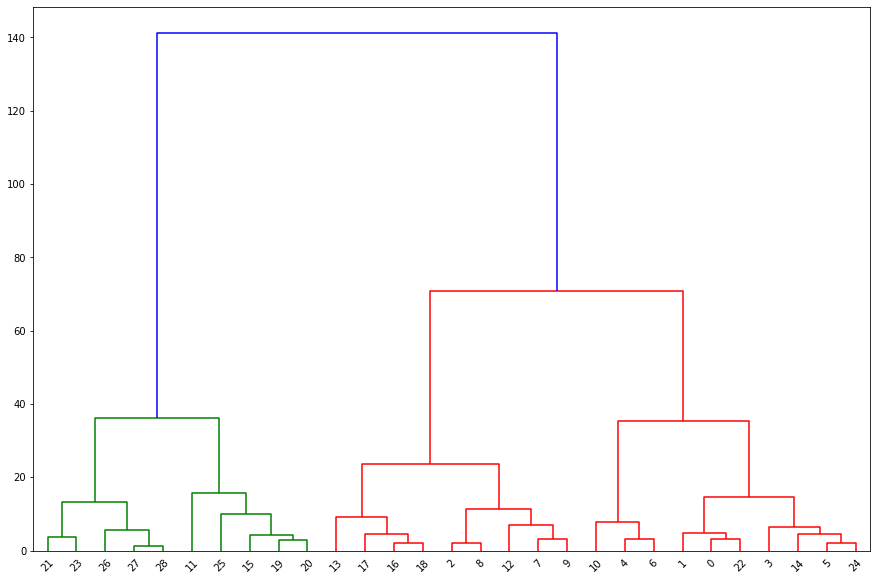

In [ ]:
print("Agglomerative clustering process...")

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

cluster = cluster.fit(df_random30)

print("Dendrogram build process...")

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

Z = hierarchy.linkage(cluster.children_, 'ward')
print("Result:")
plt.figure(figsize=(15,10))
dn = hierarchy.dendrogram(Z)

Take two clusters that are close to each other (closeness should be defined based on a dendrogram), let's say those are cluster1 and cluster2. Also, take 2 random clusters (far from each other and far from cluster1 and cluster2), let's say those are cluster3 and cluster4. Print rows corresponding for those clusters. 

HINT: In agglomerative clustering algorithm, each row at the beginning is a separate cluster, meaning that if we have 50 rows in the dataset - there will be 50 clusters (in the beginning).(However, if we continue running the algorithm - the number of clusters will decrease until they all are combined together to the one cluster.)

In [ ]:
print("clusters 20 and 23 are very close on dendrogram")
cluster1 = df_random30[cluster.labels_ == 20]
cluster2 = df_random30[cluster.labels_ == 23]

print("2 random clusters")
print("far-far away from each other...")
print("and a bit less, but still relatively far away...")
print("from cluster1 and cluster2: 18 and 22")
cluster3 = df_random30[cluster.labels_ == 18]
cluster4 = df_random30[cluster.labels_ == 22]

#Lets print the correspinding rows out
print("cluster 1:")
print(cluster1)
print("cluster 2:")
print(cluster2)
print("cluster 3:")
print(cluster3)
print("cluster 4:")
print(cluster4)


clusters 20 and 23 are very close on dendrogram
2 random clusters
far-far away from each other...
and a bit less, but still relatively far away...
from cluster1 and cluster2: 18 and 22
cluster 1:
          age  gender        income  kids  ownHome  subscribe
93  40.955539       1  60770.572609     3        0          0
cluster 2:
          age  gender        income  kids  ownHome  subscribe
56  36.880329       1  54140.791313     1        1          0
cluster 3:
           age  gender        income  kids  ownHome  subscribe
185  48.849911       0  59075.119334     0        0          0
cluster 4:
           age  gender        income  kids  ownHome  subscribe
194  44.037811       1  51354.481113     0        1          0


## Question 3 (4 point) 

In this task we will compare K-Means and Hierarchical clustering on the same dataset. 

Use the same RFM dataset with the reporting date being 2017-04-01 that you have calculated in the Q1.

First, in Q3.1 perform K-Means clusterring, then in Q3.2 visualize and compare. 

Find the cluster numbers for each of the datapoint in each algorithm and visualize customers with colors representing the clusters. Choose the dimensions for the plot of your own, for example, it can be (frequency, recency) or (monetary, frequence). Use 5 as the number of clusters for K-Means and Hierarchical clustering.


### Question 3.1 (2p)

Perform K-Means clusterring

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

dfx = new_df[['recency_new', 'frequency_new', 'monetary_new']]
dfx = pd.DataFrame(scale(dfx), index=dfx.index, columns=dfx.columns)

print("NaN values will be replaced by MEAN")
fr = dfx['frequency_new']
fr_mean = fr.mean()
fr.fillna(fr_mean, inplace=True)

fr = dfx['recency_new']
fr_mean = fr.mean()
fr.fillna(fr_mean, inplace=True)

fr = dfx['monetary_new']
fr_mean = fr.mean()
fr.fillna(fr_mean, inplace=True)

model = KMeans(n_clusters=5)
model.fit(dfx)

clusters = model.predict(dfx)
model.cluster_centers_
dfx['clusters'] = clusters

dfx.rename({'recency_new': 'Recency', 'frequency_new': 'Frequency', 'monetary_new': 'Monetary'}, axis=1, inplace=True)

NaN values will be replaced by MEAN


### Question 3.2 (2p)

Compare K-Means and Hierarchical clustering.
For comparison, we will visualize customers in two-dimensional space (by selecting two features out of recency, frequency, monetary) where customers are colored according to the cluster they belong to (1.5p).

Compare the output of two algorithms. According to you which algorithm has provided the best clustering? (0.5p)

HINT: Here is the example of how to paint the customers according to their clusters in the dimension (Col1, Col2).

Text(0, 0.5, 'Monetary')

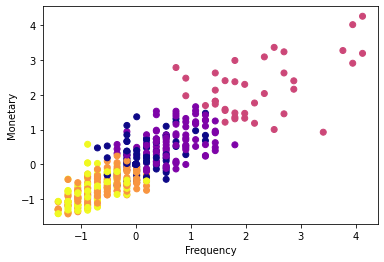

In [ ]:
plt.scatter(dfx['Frequency'], dfx['Monetary'], c=clusters, cmap="plasma")
plt.xlabel('Frequency')
plt.ylabel('Monetary')

Text(0, 0.5, 'Recency')

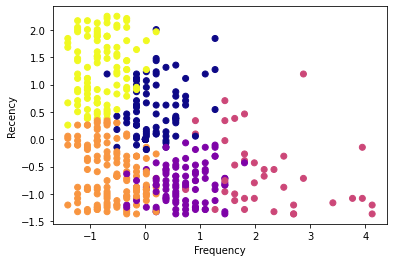

In [ ]:
plt.scatter(dfx['Frequency'], dfx['Recency'], c=clusters, cmap="plasma")
plt.xlabel('Frequency')
plt.ylabel('Recency')

Text(0, 0.5, 'Recency')

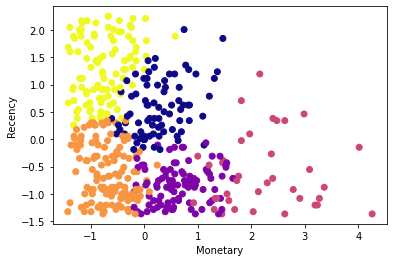

In [ ]:
plt.scatter(dfx['Monetary'], dfx['Recency'], c=clusters, cmap="plasma")
plt.xlabel('Monetary')
plt.ylabel('Recency')

## How complicate the homework was (from 0 to 10)?



Answer: 6

## How many hours you spent for this homework?





Answer: ca 8 hours